<a href="https://colab.research.google.com/github/juanalistapablo/MAIT-Monitoria-IA/blob/main/Algoritmos_de_Busca(Pesquisa_Operacional).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Introdução ao problema e força bruta

## 1.2 - O Problema das Entregas: Origem, Endereços e Destino

 📐 Distância Euclidiana – Definição Formal

A **distância euclidiana** entre dois pontos \( A \) e \( B \) no espaço \( \mathbb{R}^n \) é formalmente definida como:
$$
d(A, B) = \sqrt{\sum_{i=1}^n (b_i - a_i)^2}
$$
onde:  
$$
 A = (a_1, a_2, \ldots, a_n)   
 B = (b_1, b_2, \ldots, b_n)
$$

Essa fórmula representa a raiz quadrada da soma dos quadrados das diferenças coordenadas entre os dois pontos — uma extensão direta do Teorema de Pitágoras para qualquer dimensão.


📍 Caso específico no plano 2D – Distância Euclidiana

Sejam dois pontos no plano:

$$
A = (x_1, y_1), \quad B = (x_2, y_2)
$$

A **distância euclidiana** entre eles é dada por:

$$
d(A, B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

Essa fórmula é a aplicação direta do Teorema de Pitágoras, considerando que a distância entre dois pontos no plano forma a hipotenusa de um triângulo retângulo cujos catetos são as diferenças nas coordenadas \( x \) e \( y \).


Imagine uma empresa inovadora, enfrentando o desafio cotidiano de realizar entregas eficientes em uma cidade cheia de dinamismo. A companhia busca incessantemente formas de otimizar suas rotas de entrega para oferecer um serviço rápido e de qualidade, enquanto mantém os custos operacionais sob controle.

**Definindo a Origem: O Ponto de Partida**

Tudo começa na **origem**, o centro de distribuição. É deste ponto que os veículos de entrega saem carregados, prontos para distribuir os produtos aos clientes. A origem é representada de maneira simples e objetiva: uma tupla contendo dois elementos, a latitude e a longitude:

```python
origem = (x_origem, y_origem)
```

Esta coordenada geográfica funciona como o ponto inicial de todas as rotas de entrega planejadas para o dia.

**Estabelecendo o Destino: O Ponto de Chegada**

Cada rota precisa ter um ponto final, o **destino**. Este pode ser o próprio centro de distribuição, marcando o retorno dos veículos, ou pode ser um outro local estratégico, como um segundo centro de distribuição ou uma oficina para manutenção dos veículos. Da mesma forma que a origem, o destino é definido por uma tupla de latitude e longitude:

```python
destino = (x_destino, y_destino)
```

**Listando os Endereços: Os Pontos Intermediários**

Entre a origem e o destino, temos os **endereços de entrega**, os pontos que os veículos devem visitar para realizar as entregas. Cada endereço é um ponto no espaço, representado igualmente por uma tupla de coordenadas geográficas, formando uma lista:

```python
enderecos = [(x1, y1), (x2, y2), ..., (xn, yn)]
```

Estes são os pontos de parada obrigatória na rota, e o desafio é conectá-los da maneira mais eficiente possível.

In [ ]:
origem = (0,0)
destino = (4,4)

enderecos = [(2, 1), (2,2), (8, 3), (5, 3)]

**Definindo uma Rota Básica: Conexão Direta entre Pontos**

Antes de embarcarmos na otimização das rotas, é essencial entender como uma rota básica pode ser representada e estruturada. Uma maneira simples e intuitiva de iniciar é conectando diretamente a **origem** aos **endereços de entrega** e, finalmente, ao **destino**. Este processo gerará uma lista ordenada de pontos que delineiam um caminho a ser seguido.

**Estrutura de uma Rota**

Uma rota, neste contexto, é uma lista de tuplas, onde cada tupla representa as coordenadas cartesianas \( (x, y) \) de um ponto específico na rota. Esta lista é ordenada: começa com a origem, passa por todos os endereços de entrega, e culmina no destino. Uma representação simplificada da rota seria:

```python
rota = [origem, (x1, y1), (x2, y2), ..., (xn, yn), destino]
```

**Construindo Uma Rota Inicial**

Agora que compreendemos a estrutura básica de uma rota, podemos começar a construir a nossa rota inicial. Este processo é bastante direto, principalmente porque Python facilita a concatenação de listas.

**Criação Simplificada de uma Rota**

A rota inicial pode ser criada através da concatenação de três listas:

1. Uma lista contendo apenas a origem.
2. A lista de endereços de entrega.
3. Uma lista contendo apenas o destino.

Com este método, podemos facilmente construir a rota completa, do ponto de origem até o ponto de destino, passando por todos os endereços onde as entregas devem ser realizadas.

O código abaixo ilustra este processo de forma simplificada:

```python
rota = [origem] + enderecos + [destino]
```

In [ ]:
rota = [origem] + enderecos + [destino]

In [ ]:
rota

[(0, 0), (2, 1), (2, 2), (8, 3), (5, 3), (4, 4)]

Para visualizar efetivamente as rotas geradas e facilitar o processo de análise e otimização, utilizaremos a biblioteca `matplotlib.pyplot`. Este pacote gráfico em Python é extremamente eficaz para produzir gráficos estáticos, interativos e animados de alta qualidade em uma sintaxe simples e fácil de entender.

No Google Colab, a biblioteca `matplotlib` já vem pré-instalada, então você pode pular o passo de instalação e ir diretamente para a importação da biblioteca.

```python
import matplotlib.pyplot as plt
```

Agora, considerando que você já temos uma `rota` definida (uma lista de tuplas, onde cada tupla representa as coordenadas cartesianas de um ponto na rota), o plot da rota pode ser feito da seguinte forma:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from scipy.spatial.distance import euclidean as distancia_euclidiana

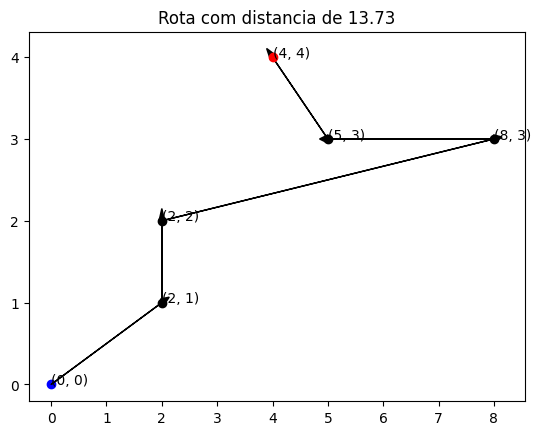

In [ ]:
# Definindo o tamanho da rota para facilitar a iteração posterior
tamanho_rota = len(rota)
# Inicializando a variável que armazenará a distância total percorrida na rota
distancia_percorrida = 0

# Iterando sobre cada ponto na rota
for i in range(tamanho_rota):
  # Coordenadas do ponto atual na iteração
  x, y = rota[i]
  # Definindo a cor padrão dos pontos como preta
  cor = "black"
  # Se o ponto atual é o ponto de origem, sua cor será azul
  if i == 0:
    cor = "blue"
  # Se o ponto atual é o ponto de destino, sua cor será vermelha
  elif i == tamanho_rota - 1:
    cor = "red"

  # Plotando o ponto atual com a cor definida
  plt.scatter(x, y, color=cor)
  plt.annotate(f"({x}, {y})", (x, y))
  # Se o ponto atual não é o último, desenhamos uma seta até o próximo ponto
  if i < tamanho_rota - 1:
    # Coordenadas do próximo ponto na rota
    x1, y1 = rota[i+1]
    # Calculando a diferença nas coordenadas para determinar o tamanho e direção da seta
    dx = x1 - x
    dy = y1 - y
    # Desenhando uma seta do ponto atual para o próximo ponto
    plt.arrow(x, y, dx, dy, color="black", head_width=0.1)
    # Atualizando a distância total percorrida com a distância até o próximo ponto
    distancia_percorrida = distancia_percorrida + distancia_euclidiana(rota[i], rota[i+1])

# Adicionando um título ao gráfico, incluindo a distância total percorrida na rota
plt.title(f"Rota com distancia de {round(distancia_percorrida, 2)}")
# Mostrando o gráfico
plt.show()


**Interpretação do Gráfico:**

1. **Pontos no Gráfico:**
   - Cada ponto (ou nó) no gráfico representa uma localização no espaço 2D, que pode ser um endereço de entrega, a origem (depósito inicial), ou o destino final (outro centro de distribuição ou oficina, por exemplo).
   - A origem é representada pelo ponto azul, e o destino pelo ponto vermelho. Os endereços de entrega intermediários são representados por pontos pretos.

2. **Setas Entre os Pontos:**
   - As setas conectam os pontos consecutivamente, indicando a sequência de entregas.
   - A direção das setas mostra o caminho que o veículo de entrega deve seguir, partindo da origem, passando pelos pontos de entrega, e finalmente chegando ao destino.

3. **Distância Percorrida:**
   - O título do gráfico apresenta a distância total percorrida nesta rota específica.
   - A distância entre cada par de pontos consecutivos é calculada usando a função `distancia_euclidiana`. Essa função calcula a distância euclidiana padrão entre dois pontos no plano cartesiano.
   - A `distancia_percorrida` é acumulada durante o loop, somando a distância entre cada par de pontos consecutivos na rota.

**Como Ler o Gráfico:**

- **Início e Fim da Rota:**
  - Olhe para os pontos azul e vermelho para identificar onde a rota começa e termina, respectivamente.

- **Sequência de Entregas:**
  - Siga as setas a partir do ponto azul para visualizar a ordem e o caminho das entregas até chegar ao ponto vermelho.

- **Distância Total:**
  - Verifique o título do gráfico para saber a distância total percorrida nessa rota.

 **Análise Adicional:**
- Este gráfico é especialmente útil para visualizar e comparar diferentes rotas propostas pelo seu algoritmo de otimização.
- A análise visual pode nos ajudar a identificar rapidamente rotas ineficientes ou pontos de entrega que estão significativamente fora do caminho ideal.

Por fim, podemos transformar esse código em uma função para reutilizarmos posteriormente.

In [ ]:
def desenhar_rota(rota):
  tamanho_rota = len(rota)
  distancia_percorrida = 0

  for i in range(tamanho_rota):
    x,y = rota[i]

    cor = "black"
    if i == 0:
      cor = "blue"
    elif i == tamanho_rota - 1:
      cor = "red"

    plt.scatter(x, y, color=cor)
    plt.annotate(f"({x}, {y})", (x, y))
    if i < tamanho_rota - 1:
      x1, y1 = rota[i+1]
      dx = x1 - x
      dy = y1 - y
      plt.arrow(x, y, dx, dy, color="black", head_width = 0.1)
      distancia_percorrida = distancia_percorrida + distancia_euclidiana(rota[i], rota[i+1])

  plt.title(f'Rota com distancia de {round(distancia_percorrida, 2)}')
  plt.show()

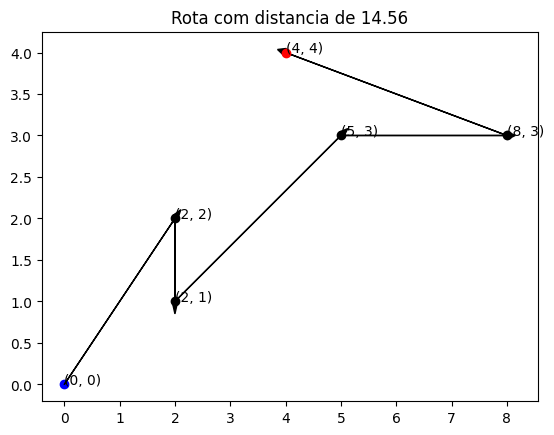

In [ ]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2, 1), (5, 3), (8, 3)]

rota = [origem] + enderecos + [destino]
desenhar_rota(rota)

## 1.3 - Resolução via Força Bruta


O método de **Força Bruta** é uma abordagem direta e exaustiva para resolver o problema de otimização da rota de entrega. Este método não faz suposições, não elimina alternativas e, de fato, examina todas as possíveis combinações de rotas para encontrar a mais eficiente.


In [ ]:
from itertools import permutations

In [ ]:
def calcular_distancia_rota(rota):
    """
    Esta função calcula a distância total de uma rota, somando as distâncias
    euclidianas entre pontos consecutivos da rota fornecida.

    Parameters:
    rota (list): Uma lista de pontos (tuplas) onde cada ponto representa uma posição no espaço.

    Returns:
    float: A distância total percorrida na rota.
    """

    distancia = 0  # Inicializa a variável que armazenará a distância total.
    tamanho_rota = len(rota)  # Armazena o número total de pontos na rota.

    # Itera sobre cada ponto na rota.
    for i in range(tamanho_rota):
        # Verifica se o ponto atual não é o último na rota.
        if i < tamanho_rota - 1:
            # Calcula e acumula a distância euclidiana entre o ponto atual e o próximo.
            distancia = distancia + distancia_euclidiana(rota[i], rota[i+1])

    return distancia  # Retorna a distância total calculada.



**Funcionamento do Método:**
O método de Força Bruta cria todas as permutações possíveis dos endereços de entrega (excluindo origem e destino), criando assim todas as rotas possíveis. Para cada rota gerada, podemos calcular a distância total usando uma função `calcular_distancia_rota` e mantém um registro da rota que tem a menor distância total. A função `calcular_distancia_rota` é uma função que retorna a soma das distâncias entre todos os pontos consecutivos na rota.

**Implementação com Permutations:**
Na implementação usando o `permutations` do módulo `itertools`, cada permutação dos endereços é considerada uma rota possível. Para cada permutação, a origem é adicionada no início, e o destino é adicionado no final da lista de endereços permutados. Então, a distância total da rota é calculada, e a rota é comparada com a rota conhecida de menor distância. Se a rota recém-calculada tem uma distância menor, ela se torna a nova rota de menor distância.

In [ ]:
# calculando todas as combinaçoes de rotas
for permutacao in permutations(enderecos):
  rota =  [origem] + list(permutacao) + [destino]
  print(rota)

[(0, 0), (2, 2), (2, 1), (5, 3), (8, 3), (4, 4)]
[(0, 0), (2, 2), (2, 1), (8, 3), (5, 3), (4, 4)]
[(0, 0), (2, 2), (5, 3), (2, 1), (8, 3), (4, 4)]
[(0, 0), (2, 2), (5, 3), (8, 3), (2, 1), (4, 4)]
[(0, 0), (2, 2), (8, 3), (2, 1), (5, 3), (4, 4)]
[(0, 0), (2, 2), (8, 3), (5, 3), (2, 1), (4, 4)]
[(0, 0), (2, 1), (2, 2), (5, 3), (8, 3), (4, 4)]
[(0, 0), (2, 1), (2, 2), (8, 3), (5, 3), (4, 4)]
[(0, 0), (2, 1), (5, 3), (2, 2), (8, 3), (4, 4)]
[(0, 0), (2, 1), (5, 3), (8, 3), (2, 2), (4, 4)]
[(0, 0), (2, 1), (8, 3), (2, 2), (5, 3), (4, 4)]
[(0, 0), (2, 1), (8, 3), (5, 3), (2, 2), (4, 4)]
[(0, 0), (5, 3), (2, 2), (2, 1), (8, 3), (4, 4)]
[(0, 0), (5, 3), (2, 2), (8, 3), (2, 1), (4, 4)]
[(0, 0), (5, 3), (2, 1), (2, 2), (8, 3), (4, 4)]
[(0, 0), (5, 3), (2, 1), (8, 3), (2, 2), (4, 4)]
[(0, 0), (5, 3), (8, 3), (2, 2), (2, 1), (4, 4)]
[(0, 0), (5, 3), (8, 3), (2, 1), (2, 2), (4, 4)]
[(0, 0), (8, 3), (2, 2), (2, 1), (5, 3), (4, 4)]
[(0, 0), (8, 3), (2, 2), (5, 3), (2, 1), (4, 4)]
[(0, 0), (8, 3), (2,

In [ ]:
# rotas + distancia
for permutacao in permutations(enderecos):
  rota =  [origem] + list(permutacao) + [destino]
  print(rota, calcular_distancia_rota(rota)) #

[(0, 0), (2, 2), (2, 1), (5, 3), (8, 3), (4, 4)] 14.557084025827841
[(0, 0), (2, 2), (2, 1), (8, 3), (5, 3), (4, 4)] 14.567196007456046
[(0, 0), (2, 2), (5, 3), (2, 1), (8, 3), (4, 4)] 20.04391700633298
[(0, 0), (2, 2), (5, 3), (8, 3), (2, 1), (4, 4)] 18.920811380715318
[(0, 0), (2, 2), (8, 3), (2, 1), (5, 3), (4, 4)] 20.255509813218254
[(0, 0), (2, 2), (8, 3), (5, 3), (2, 1), (4, 4)] 19.12229220597239
[(0, 0), (2, 1), (2, 2), (5, 3), (8, 3), (4, 4)] 13.52145126328583
[(0, 0), (2, 1), (2, 2), (8, 3), (5, 3), (4, 4)] 13.733044070171104
[(0, 0), (2, 1), (5, 3), (2, 2), (8, 3), (4, 4)] 19.20976506904804
[(0, 0), (2, 1), (5, 3), (8, 3), (2, 2), (4, 4)] 17.75280890800819
[(0, 0), (2, 1), (8, 3), (2, 2), (5, 3), (4, 4)] 19.219877050676242
[(0, 0), (2, 1), (8, 3), (5, 3), (2, 2), (4, 4)] 17.55132808275112
[(0, 0), (5, 3), (2, 2), (2, 1), (8, 3), (4, 4)] 20.440890500968102
[(0, 0), (5, 3), (2, 2), (8, 3), (2, 1), (4, 4)] 25.006098681112647
[(0, 0), (5, 3), (2, 1), (2, 2), (8, 3), (4, 4)] 20.64

[(0, 0), (2, 1), (2, 2), (5, 3), (8, 3), (4, 4)] 13.52145126328583


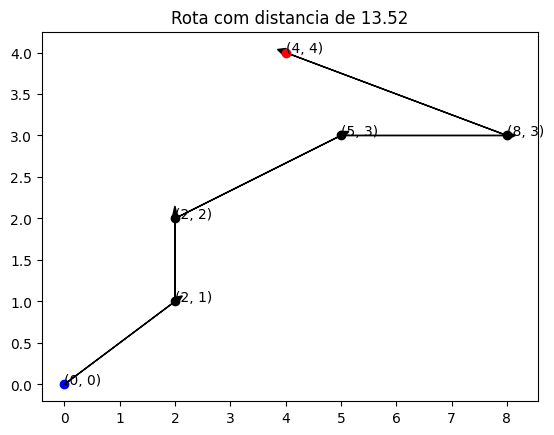

In [ ]:
# Definindo as variáveis para armazenar a menor distância e a rota correspondente
menor_distancia = float('inf')  # Inicializando a menor distância com infinito
menor_rota = None  # Inicializando a variável que armazenará a rota correspondente à menor distância

# Iterando sobre todas as permutações possíveis dos endereços
for permutacao in permutations(enderecos):
    # Construindo a rota atual adicionando o ponto de origem no início,
    # o ponto de destino no final, e a permutação atual dos endereços no meio
    rota = [origem] + list(permutacao) + [destino]

    # Calculando a distância total da rota atual usando a função definida anteriormente
    distancia_rota = calcular_distancia_rota(rota)

    # Verificando se a distância total da rota atual é menor que a menor distância registrada até agora
    if distancia_rota < menor_distancia:
        # Atualizando a menor distância e a rota correspondente
        menor_distancia = distancia_rota
        menor_rota = rota

# Imprimindo a menor rota e sua distância correspondente
print(menor_rota, menor_distancia)

# Desenhando a rota no espaço, usando uma função 'desenhar_rota()' que deve estar definida em algum lugar no seu código
desenhar_rota(menor_rota)


##  1.4 - Análise de Eficiência da Força Bruta


Podemos definir uma função para reutilizar posteriormente caso necessário.

In [ ]:
def forca_bruta(origem, destino, enderecos):
    # Inicializa a variável que vai armazenar a menor distância encontrada
    # com infinito, pois qualquer distância calculada será menor que infinito.
    menor_distancia = float('inf')

    # Inicializa a variável que vai armazenar a rota correspondente à menor distância
    # com None, pois ainda não encontramos nenhuma rota.
    menor_rota = None

    # Itera sobre todas as permutações possíveis dos endereços.
    # permutations(enderecos) retorna todas as possíveis ordenações dos endereços,
    # ou seja, todas as rotas possíveis (sem considerar origem e destino).
    for permutacao in permutations(enderecos):
        # Cria uma rota completa adicionando a origem no início da permutação
        # dos endereços e o destino no final.
        rota = [origem] + list(permutacao) + [destino]

        # Calcula a distância total da rota usando a função calcular_distancia_rota
        distancia_rota = calcular_distancia_rota(rota)

        # Verifica se a distância da rota calculada é menor que a menor distância encontrada até agora.
        # Se for, atualiza as variáveis menor_distancia e menor_rota.
        if distancia_rota < menor_distancia:
            menor_distancia = distancia_rota
            menor_rota = rota

    # Retorna a menor rota encontrada e sua respectiva distância.
    return menor_rota, menor_distancia


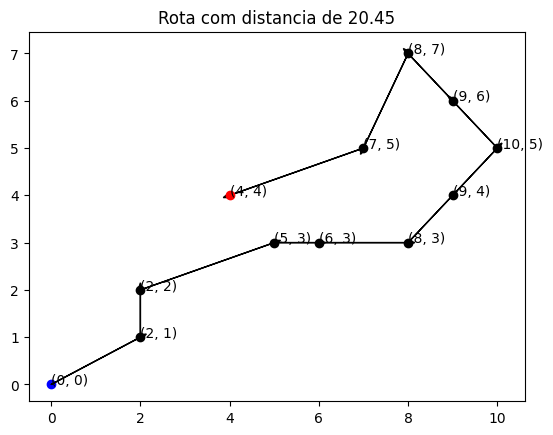

In [ ]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2, 1), (5, 3), (8, 3), (10, 5), (9, 4), (8, 7), (6, 3), (9, 6), (7, 5)]# 10! vezes reperesenta o numero permutações calculadas

menor_rota, menor_distancia = forca_bruta(origem, destino, enderecos)
desenhar_rota(menor_rota)

Observe que demorou seis minutos para executar tudo, desde encontrar a melhor rota até montar o gráfico. Com o aumento para 8 pontos, a execução ocorreu de maneira razoável e em um tempo adequado, mas agora com 10 pontos, demorou cerca de **6 minutos**.

Isso levanta uma questão: é um método realmente eficiente? Estamos usando a abordagem correta?

**Prós e contras**


Quais são os pontos positivos desse tipo de método?

Fácil implementação: observe que em cerca de 10 linhas de código nós resolvemos o problema.
Fácil interpretação: é simples explicar por que essa é a melhor solução. Qualquer pessoa que nos perguntar, conseguimos explicar que percorremos todas as possíveis soluções, todas as possíveis rotas. Por isso, temos absoluta certeza de que esta é a melhor solução.
Garantia da melhor solução: esse é o principal ponto positivo desse tipo de método, essa garantia de solução ótima, pois descobrimos a menor rota possível.
E quais são os contras?

Alta complexidade computacional: para uma quantidade mediana de pontos, ou até baixa em alguns contextos, já se torna muito difícil e requer muita capacidade de processamento.
Claro que podemos melhorar a implementação, torná-la mais eficiente e paralelizá-la. Mas mesmo assim, com 20 ou 30 pontos, já se torna impossível realizar esse cálculo.

**Conclusões**

Nessa primeira aula, definimos o problema de roteamento, que consiste basicamente em sair de uma origem, passar por uma lista de endereços e chegar ao destino final.

Também aprendemos um primeiro método de resolução, que é a busca por exaustão ou força bruta, onde enumeramos todas as possíveis soluções e buscamos a que tenha o melhor resultado. No nosso caso, era ter a menor distância percorrida.

Além disso, fizemos uma avaliação da capacidade computacional desse método, ou seja, analisamos que quanto mais aumentamos o tamanho da lista de endereços, mais ele exige de poder computacional e entendemos que isso pode, em algum momento, tornar-se inviável.

Portanto, a pergunta que fica é: quais outros métodos podemos usar para resolver esse tipo de problema?

Devem resolver de uma maneira mais ágil e rápida, mesmo que por vezes com perda de qualidade na solução, pois não garantiria a melhor solução possível.

Existem outros métodos? Quais seriam eles? É isso que vamos explorar nas próximas aulas.

# 2 - Metodos de Heuristica e Meta-heuristica

## 2.1 - Implementação Algorimos Gulosos





In [ ]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2, 1), (5, 3), (8, 3)]


In [ ]:
ponto_atual = origem
# copia para sempre que for visitatdo remover o da lista.
enderecos_restantes = enderecos.copy()

distancia_percorrida = 0
menor_rota = [ponto_atual]

In [ ]:
while enderecos_restantes:
  # encontrar o ponto mais proximo do ponto atual
    menor_distancia = float('inf')
    ponto_mais_proximo = None
    for endereco in enderecos_restantes:
        distancia = distancia_euclidiana(ponto_atual, endereco)
        if distancia < menor_distancia:
            menor_distancia = distancia
            ponto_mais_proximo = endereco

    # remover esse ponto da lista de enderecos
    enderecos_restantes.remove(ponto_mais_proximo)
    # adicionar esse ponto na menor_rota
    menor_rota.append(ponto_mais_proximo)
    # atualizar a distancia_percorrida
    distancia_percorrida = distancia_percorrida + menor_distancia
    # atualizar o ponto atual
    ponto_atual = ponto_mais_proximo

menor_rota.append(destino)
distancia_percorrida = distancia_percorrida + distancia_euclidiana(ponto_atual, destino)

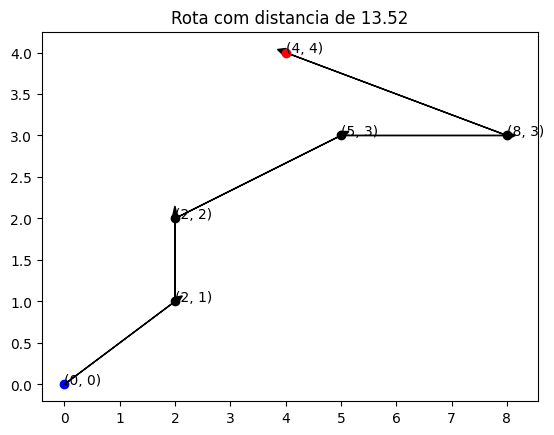

In [ ]:
menor_rota, distancia_percorrida
desenhar_rota(menor_rota) # mema distancia da força bruta

In [ ]:
#definido menor rota como funçao
def visinho_mais_proximo(origem, destino, enderecos):
  ponto_atual = origem
  # copia para sempre que for visitatdo remover o da lista.
  enderecos_restantes = enderecos.copy()

  distancia_percorrida = 0
  menor_rota = [ponto_atual]

  while enderecos_restantes:
    # encontrar o ponto mais proximo do ponto atual
      menor_distancia = float('inf')
      ponto_mais_proximo = None
      for endereco in enderecos_restantes:
          distancia = distancia_euclidiana(ponto_atual, endereco)
          if distancia < menor_distancia:
              menor_distancia = distancia
              ponto_mais_proximo = endereco

      # remover esse ponto da lista de enderecos
      enderecos_restantes.remove(ponto_mais_proximo)
      # adicionar esse ponto na menor_rota
      menor_rota.append(ponto_mais_proximo)
      # atualizar a distancia_percorrida
      distancia_percorrida = distancia_percorrida + menor_distancia
      # atualizar o ponto atual
      ponto_atual = ponto_mais_proximo

  menor_rota.append(destino)
  distancia_percorrida = distancia_percorrida + distancia_euclidiana(ponto_atual, destino)
  menor_rota, distancia_percorrida

  return menor_rota, distancia_percorrida


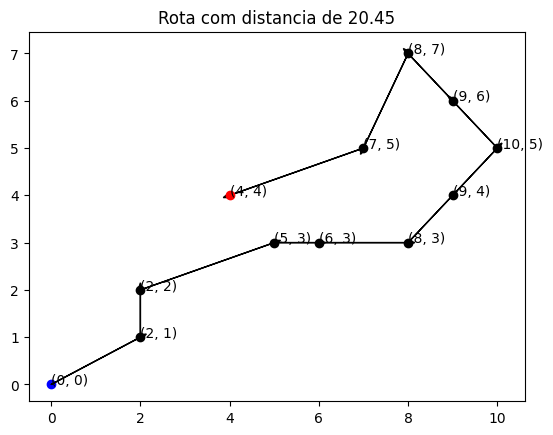

In [ ]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2, 1), (5, 3), (8, 3), (10, 5), (9, 4), (8, 7), (6, 3), (9, 6), (7, 5)] # recalculando problema de dez pontos

menor_rota, menor_distancia = visinho_mais_proximo(origem, destino, enderecos)
desenhar_rota(menor_rota)

## 2.2 - Implementação de algoritmos genéticos

**Para saber mais: algoritmos genéticos - Inspiração natural em resolução de problemas**

Já pensou sobre a teoria da evolução proposta por Charles Darwin e as contribuições do campo da genética? Ambas trazem a base para o que hoje é chamado de teoria da evolução moderna. De maneira geral, propõe-se que as espécies mudam ao longo do tempo, através de mecanismos como seleção natural e mutação. Ainda de acordo com esta teoria, os indivíduos melhor adaptados ao seu ambiente são mais propensos a sobreviver e se reproduzir, passando adiante seus genes vantajosos.

Agora, imagine aplicar esse princípio na otimização de uma rota de entrega entre um ponto de origem e destino, passando por quatro endereços distintos: A, B, C e D. Esta analogia nos introduz à mecânica dos algoritmos genéticos.

Pensando em um conjunto inicial de rotas possíveis, representando a primeira "geração" ou "população". Tal qual no reino natural, cada rota, simbolizada como "indivíduo", possui características distintas, seus "genes". No entanto, em vez de características físicas, como a cor de um pelo ou o formato de um bico, aqui, os "genes" delineiam a sequência de endereços. Por exemplo, o endereço Origem → A → B → C → D → Destino é uma rota potencial.

A essência do processo é similar à seleção natural. Em um ambiente de entregas, avaliamos a "aptidão" de cada rota pela sua eficiência. Por exemplo, a rota Origem → A → C → B → D → Destino pode ser mais curta e, portanto, mais "apta" do que Origem → C → B → A → D → Destino. Aquelas rotas que se provarem mais eficientes são escolhidas para "reproduzir".

Agora, considerando o processo de cruzamento ou recombinação, vamos supor que duas rotas sejam selecionadas: Origem → A → B → C → D → Destino e Origem → B → A → D → C → Destino. Um cruzamento possível entre elas poderia resultar na nova rota: Origem → A → B → D → C → Destino ou Origem → B → A → C → D → Destino, mesclando partes de ambas.

E para assegurar a diversidade e evitar estagnação, introduzem-se "mutações", como a troca aleatória de dois endereços. Pegue a rota Origem → A → C → B → D → Destino. Uma mutação poderia trocar os endereços B e C, resultando em Origem → A → B → C → D → Destino.

Através de repetidas iterações de seleção, cruzamento e mutação, a população evolui. As rotas se tornam cada vez mais otimizadas. E o aspecto mais fascinante? Esta estratégia é um eco direto da evolução natural.

Os algoritmos genéticos são notáveis pela sua capacidade de replicar processos naturais na resolução de problemas que, à primeira vista, parecem desconexos da biologia. Entretanto, à medida que aprofunda no tema, torna-se evidente que a busca por eficiência é uma constante, seja na evolução das espécies ou na otimização logística.

In [ ]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2, 1), (5, 3), (8, 3)]

In [ ]:
#funçao que avalia o indv
def avaliar(individuo, origem, enderecos, destino):
  rota = [origem]
  for i in individuo:
     rota.append(enderecos[i])
  rota.append(destino)

  distancia_percorrida = calcular_distancia_rota(rota)

  return distancia_percorrida,

In [ ]:
individuo = [ 0, 1, 2, 3] #codigo genetico do indv
avaliar(individuo, origem, enderecos, destino)


(np.float64(14.557084025827841),)

In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 3.4 MB/s eta 0:00:00


In [ ]:
from deap import base, creator, tools, algorithms
import numpy as np

In [ ]:
# Define o tamanho da população inicial
tam_populacao_inicial = 100
# Define a probabilidade de cruzamento
prob_cruzamento = 0.7
# Define a probabilidade de mutação
prob_mutacao = 0.1
# Define o número de gerações
numero_geracoes = 100

# Cria o tipo 'FitnessMin' que visa minimizar o valor da função objetivo (distância da rota)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# Cria o tipo 'Individuo', que é uma lista com um atributo de fitness do tipo 'FitnessMin'
creator.create("Individuo", list, fitness=creator.FitnessMin)

# Inicializa uma caixa de ferramentas para armazenar as configurações do algoritmo
toolbox = base.Toolbox()
# Registra a função 'Genes', que gera uma permutação aleatória de índices dos endereços
toolbox.register("Genes", np.random.permutation, len(enderecos))
# Registra a função 'Individuos', que inicializa um indivíduo (rota) usando 'Genes'
toolbox.register("Individuos", tools.initIterate, creator.Individuo, toolbox.Genes)

# Registra a função 'Populacao', que cria uma população de indivíduos
toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)
# Cria a população inicial com 'tam_populacao_inicial' indivíduos
populacao = toolbox.Populacao(n=tam_populacao_inicial)

# Registra o operador de cruzamento do tipo 'cxPartialyMatched'
toolbox.register("mate", tools.cxPartialyMatched)
# Registra o operador de mutação do tipo 'mutShuffleIndexes' com probabilidade de mutação por bit 'indpb'
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=prob_mutacao)
# Registra o operador de seleção do tipo 'selTournament' com tamanho do torneio '3'
toolbox.register("select", tools.selTournament, tournsize=3)
# Registra a função de avaliação 'avaliar' com os argumentos de origem, endereços e destino
toolbox.register("evaluate", avaliar, origem=origem, enderecos=enderecos, destino=destino)

# Executa o algoritmo genético simples com os operadores e parâmetros definidos anteriormente
algoritmo = algorithms.eaSimple(populacao,
                                toolbox,
                                cxpb=prob_cruzamento,  # Probabilidade de cruzamento
                                mutpb=prob_cruzamento,  # Probabilidade de mutação
                                ngen=numero_geracoes,  # Número de gerações
                                verbose=False)  # Desativa a saída de log detalhada

# Seleciona o melhor indivíduo da população final
melhor_ind = tools.selBest(populacao, 1)[0]


In [ ]:
melhor_ind

[np.int64(1), np.int64(0), np.int64(2), np.int64(3)]

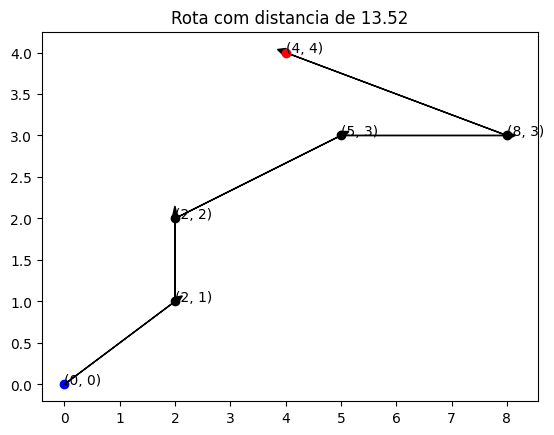

In [ ]:
# Inicializa a variável menor_rota com o ponto de origem
menor_rota = [origem]

# Itera sobre os índices contidos no melhor indivíduo encontrado
# Cada índice em melhor_ind corresponde a um endereço na lista de endereços
for i in melhor_ind:
    # Adiciona o endereço correspondente ao índice i na lista menor_rota
    menor_rota.append(enderecos[i])

# Após iterar por todos os endereços, adiciona o ponto de destino à lista menor_rota
menor_rota.append(destino)

# Utiliza a função desenhar_rota para visualizar graficamente a rota encontrada
# Esta função deve estar definida previamente e ser capaz de receber uma lista de pontos (rota)
# e desenhar a rota correspondente
desenhar_rota(menor_rota)


In [ ]:
def algoritmo_genetico(origem, destino, enderecos, tam_populacao_inicial=100, prob_cruzamento=0.7, prob_mutacao=0.1, numero_geracoes=100):

  # Cria o tipo 'FitnessMin' que visa minimizar o valor da função objetivo (distância da rota)
  creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
  # Cria o tipo 'Individuo', que é uma lista com um atributo de fitness do tipo 'FitnessMin'
  creator.create("Individuo", list, fitness=creator.FitnessMin)

  # Inicializa uma caixa de ferramentas para armazenar as configurações do algoritmo
  toolbox = base.Toolbox()
  # Registra a função 'Genes', que gera uma permutação aleatória de índices dos endereços
  toolbox.register("Genes", np.random.permutation, len(enderecos))
  # Registra a função 'Individuos', que inicializa um indivíduo (rota) usando 'Genes'
  toolbox.register("Individuos", tools.initIterate, creator.Individuo, toolbox.Genes)

  # Registra a função 'Populacao', que cria uma população de indivíduos
  toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)
  # Cria a população inicial com 'tam_populacao_inicial' indivíduos
  populacao = toolbox.Populacao(n=tam_populacao_inicial)

  # Registra o operador de cruzamento do tipo 'cxPartialyMatched'
  toolbox.register("mate", tools.cxPartialyMatched)
  # Registra o operador de mutação do tipo 'mutShuffleIndexes' com probabilidade de mutação por bit 'indpb'
  toolbox.register("mutate", tools.mutShuffleIndexes, indpb=prob_mutacao)
  # Registra o operador de seleção do tipo 'selTournament' com tamanho do torneio '3'
  toolbox.register("select", tools.selTournament, tournsize=3)
  # Registra a função de avaliação 'avaliar' com os argumentos de origem, endereços e destino
  toolbox.register("evaluate", avaliar, origem=origem, enderecos=enderecos, destino=destino)

  # Executa o algoritmo genético simples com os operadores e parâmetros definidos anteriormente
  algoritmo = algorithms.eaSimple(populacao,
                                  toolbox,
                                  cxpb=prob_cruzamento,  # Probabilidade de cruzamento
                                  mutpb=prob_cruzamento,  # Probabilidade de mutação
                                  ngen=numero_geracoes,  # Número de gerações
                                  verbose=False)  # Desativa a saída de log detalhada

  # Seleciona o melhor indivíduo da população final
  melhor_ind = tools.selBest(populacao, 1)[0]


  # Inicializa a variável menor_rota com o ponto de origem
  menor_rota = [origem]

  # Itera sobre os índices contidos no melhor indivíduo encontrado
  # Cada índice em melhor_ind corresponde a um endereço na lista de endereços
  for i in melhor_ind:
      # Adiciona o endereço correspondente ao índice i na lista menor_rota
      menor_rota.append(enderecos[i])

  # Após iterar por todos os endereços, adiciona o ponto de destino à lista menor_rota
  menor_rota.append(destino)

  # Calcula distancia percorrida
  distancia_percorrida = calcular_distancia_rota(menor_rota)

  return menor_rota, distancia_percorrida

In [ ]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2, 1), (5, 3), (8, 3), (10, 5), (9, 4), (8, 7), (6, 3), (9, 6), (7, 5), (9, 1), (11, 10), (3, 6), (10, 10)]

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


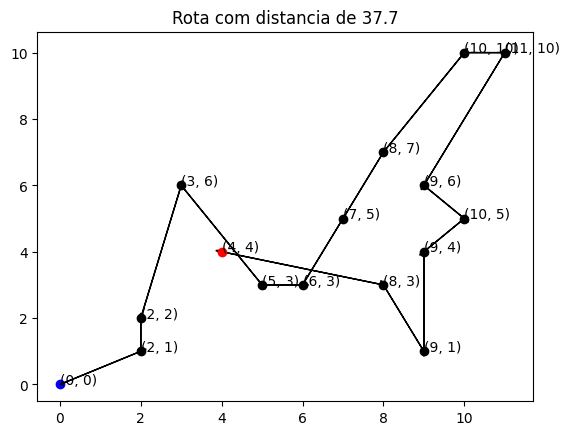

In [ ]:
menor_rota, distancia_percorrida = algoritmo_genetico(origem, destino, enderecos, numero_geracoes=100)
desenhar_rota(menor_rota)

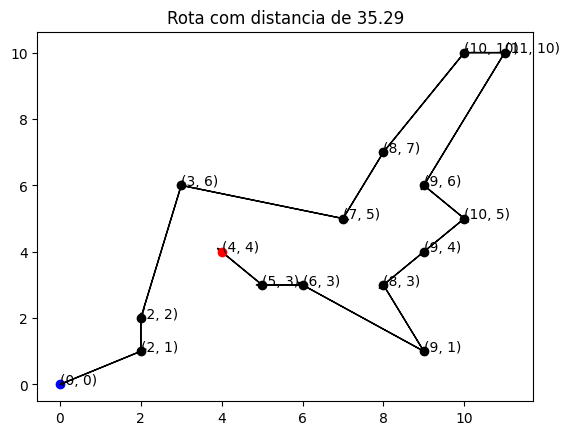

In [ ]:
menor_rota, distancia_percorrida = algoritmo_genetico(origem, destino, enderecos, numero_geracoes=100)
desenhar_rota(menor_rota)

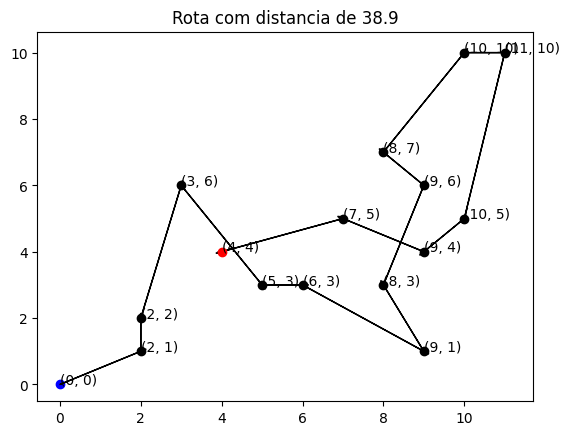

In [ ]:
menor_rota, distancia_percorrida = algoritmo_genetico(origem, destino, enderecos, numero_geracoes=100)
desenhar_rota(menor_rota)

Então, é interessante notar como as mudanças de parâmetros podem impactar nos resultados dos algoritmos genéticos. Mas será que há outros métodos e estratégias para resolver esse problema? Utilizando talvez algum conceito matemático ou estrutura de dados mais eficiente? É isso que vamos explorar na próxima aula!